In [9]:
# Import dependencies
import pandas as pd
import warnings
warnings.simplefilter('ignore')
import os
import seaborn as sn
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# Read the CSV
heart = pd.read_csv("cleaned_cardio.csv")
heart.head()

,age,height,weight,ap_hi,ap_lo,cardio,BMI,gender_1,gender_2,cholesterol_1,...,cholesterol_3,gluc_1,gluc_2,gluc_3,smoke_0,smoke_1,alco_0,alco_1,active_0,active_1
0,50.0,66.0,136.0,110,80,0,21.948577,0,1,1,...,0,1,0,0,1,0,1,0,0,1
1,55.0,61.0,187.0,140,90,1,35.329481,1,0,0,...,1,1,0,0,1,0,1,0,0,1
2,52.0,65.0,141.0,130,70,1,23.461065,1,0,0,...,1,1,0,0,1,0,1,0,1,0
3,48.0,67.0,180.0,150,100,1,28.188906,0,1,1,...,0,1,0,0,1,0,1,0,0,1
4,48.0,61.0,123.0,100,60,0,23.238108,1,0,1,...,0,1,0,0,1,0,1,0,1,0


In [11]:
target = heart["cardio"].values.reshape(-1,1)
target_names = ["no-attack", "attack"]

In [12]:
data = heart.drop("cardio", axis=1)
feature_names = data.columns
data.head()

,age,height,weight,ap_hi,ap_lo,BMI,gender_1,gender_2,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3,smoke_0,smoke_1,alco_0,alco_1,active_0,active_1
0,50.0,66.0,136.0,110,80,21.948577,0,1,1,0,0,1,0,0,1,0,1,0,0,1
1,55.0,61.0,187.0,140,90,35.329481,1,0,0,0,1,1,0,0,1,0,1,0,0,1
2,52.0,65.0,141.0,130,70,23.461065,1,0,0,0,1,1,0,0,1,0,1,0,1,0
3,48.0,67.0,180.0,150,100,28.188906,0,1,1,0,0,1,0,0,1,0,1,0,0,1
4,48.0,61.0,123.0,100,60,23.238108,1,0,1,0,0,1,0,0,1,0,1,0,1,0


In [13]:
# Set up train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [14]:
# Perform MultinmialNB
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model = model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7126282649253731

In [17]:
# Perform GridSearch on NB
from sklearn.model_selection import GridSearchCV

params = {'alpha': np.linspace(0.5, 1.5, 6)}

nbgs = GridSearchCV(model, param_grid=params, n_jobs=-1)
nbgs.fit(X_train, y_train)
print("Best Hyper Parameters:\n",nbgs.best_params_)
prediction=nbgs.predict(X_test)

Best Hyper Parameters:
 {'alpha': 0.5}


In [18]:
# Print Accuracy
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(prediction,y_test))

Accuracy: 0.7126282649253731


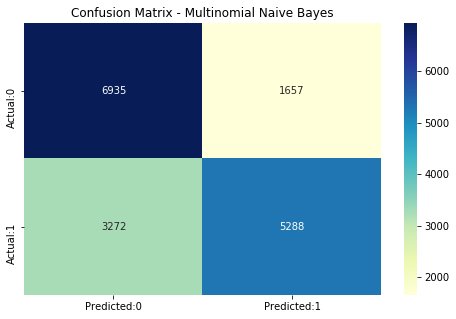

In [19]:
# Perform Confusion matrix on NB
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,prediction)
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
plt.title("Confusion Matrix - Multinomial Naive Bayes")
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.savefig("Confusion_Matrix_NB.png")

In [20]:
# Calculate Classification report
from sklearn.metrics import classification_report

class_report = classification_report(y_test, prediction, target_names=target_names, output_dict = True)
df = pd.DataFrame(class_report).transpose()
df_to_html = df.to_html()
print(class_report)
print(df_to_html)

{'no-attack': {'precision': 0.679435681395121, 'recall': 0.8071461824953445, 'f1-score': 0.7378052024043832, 'support': 8592}, 'attack': {'precision': 0.761411087113031, 'recall': 0.6177570093457944, 'f1-score': 0.6821025475653015, 'support': 8560}, 'accuracy': 0.7126282649253731, 'macro avg': {'precision': 0.7204233842540759, 'recall': 0.7124515959205695, 'f1-score': 0.7099538749848424, 'support': 17152}, 'weighted avg': {'precision': 0.7203469146591898, 'recall': 0.7126282649253731, 'f1-score': 0.7100058364165953, 'support': 17152}}
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>f1-score</th>
      <th>precision</th>
      <th>recall</th>
      <th>support</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>no-attack</th>
      <td>0.737805</td>
      <td>0.679436</td>
      <td>0.807146</td>
      <td>8592.000000</td>
    </tr>
    <tr>
      <th>attack</th>
      <td>0.682103</td>
      <td>0.761411</td>
      <td>0.6

In [21]:
# Discuss the accuracy and Sensitivity of the file
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',
'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',
'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',
'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',
'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'‘\n',
'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',
'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',
'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.7126282649253731 
 The Missclassification = 1-Accuracy =  0.2873717350746269 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.6177570093457944 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.8071461824953445 
 Positive Predictive value = TP/(TP+FP) =  0.761411087113031 ‘
 Negative predictive Value = TN/(TN+FN) =  0.679435681395121 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  3.203239724984349 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.4735734355733143


In [22]:
# Find the best model
best_nb = nbgs.best_estimator_
best_nb

MultinomialNB(alpha=0.5, class_prior=None, fit_prior=True)

With 0.1 threshold the Confusion Matrix is  
 [[  15 8577]
 [   4 8556]] 
 with 8571 correct predictions and 4 Type II errors( False Negatives) 

 Sensitivity:  0.9995327102803738 Specificity:  0.0017458100558659217 



With 0.2 threshold the Confusion Matrix is  
 [[ 441 8151]
 [ 107 8453]] 
 with 8894 correct predictions and 107 Type II errors( False Negatives) 

 Sensitivity:  0.9875 Specificity:  0.0513268156424581 



With 0.3 threshold the Confusion Matrix is  
 [[2280 6312]
 [ 745 7815]] 
 with 10095 correct predictions and 745 Type II errors( False Negatives) 

 Sensitivity:  0.9129672897196262 Specificity:  0.26536312849162014 



With 0.4 threshold the Confusion Matrix is  
 [[5500 3092]
 [2163 6397]] 
 with 11897 correct predictions and 2163 Type II errors( False Negatives) 

 Sensitivity:  0.7473130841121496 Specificity:  0.6401303538175046 



75.515%


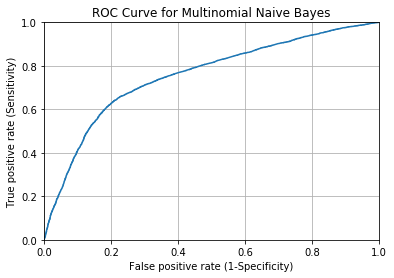

In [23]:
# ROC Curve
from sklearn.preprocessing import binarize

for i in range(1,5):
   cm2=0
   y_pred_prob_yes=best_nb.predict_proba(X_test)
   y_pred2=binarize(y_pred_prob_yes,i/10)[:,1]
   cm2=confusion_matrix(y_test,y_pred2)
   print ('With',i/10,'threshold the Confusion Matrix is ','\n',cm2,'\n',
           'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors( False Negatives)','\n\n',
         'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n\n\n')

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
AUROC_Score_nb = roc_auc_score(y_test,y_pred_prob_yes[:,1])
score_nb = "{0:.3%}".format(AUROC_Score_nb)
print(score_nb)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve for Multinomial Naive Bayes')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)
plt.savefig("ROC_Curve_NB.png")

In [24]:
# Use pickle to have user inputs
import pickle

pkl_nb_filename = "pickle_nb.pkl"
with open(pkl_nb_filename, "wb") as file:
    pickle.dump(best_nb, file)
    
with open(pkl_nb_filename, "rb") as file:
    pickle_model_nb = pickle.load(file)
    
pickle_model_nb

MultinomialNB(alpha=0.5, class_prior=None, fit_prior=True)

In [27]:
# Test the model
import numpy as np

new_user_input = np.array([[61,62,205,130,80,37.49,1,0,0,0,1,1,0,0,1,0,1,0,0,1]])

best_nb_score = pickle_model_nb.score(X_test, y_test)
perc_score_nb = 100*best_nb_score
print("Test Score: {:.2f} %".format(perc_score_nb))
predict_nb = pickle_model_nb.predict(new_user_input)
predict_nb   


Test Score: 71.26 %


array([1], dtype=int64)